### Задание 1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

С использованием intercept

In [3]:
b = (np.mean(zp*ks) - np.mean(zp)*np.mean(ks)) / (np.mean(zp**2)-np.mean(zp)**2)
b

2.620538882402765

In [4]:
a = np.mean(ks) - b*np.mean(zp)
a

444.1773573243596

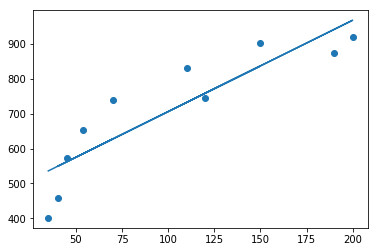

In [5]:
plt.scatter(zp, ks)
plt.plot(zp, b*zp+a)

Без использования intercept в матричном виде

In [6]:
zp = zp.reshape((1,-1 ))

In [7]:
ks = ks.reshape((1,-1 ))

In [8]:
(np.linalg.inv(zp @ zp.T) @ zp) @ ks.T

array([[5.88982042]])

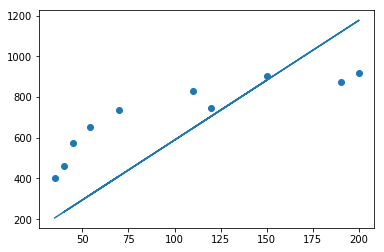

In [9]:
plt.scatter(zp[0], ks[0])
plt.plot(zp[0], zp[0]*5.88982042)

С использования intercept в матричном виде

In [10]:
zp = np.vstack([np.ones((1,10)), zp])

In [11]:
W = (np.linalg.inv(zp @ zp.T) @ zp) @ ks.T

In [12]:
w0 = W[0][0]
w0

444.17735732435915

In [13]:
w1 = W[1][0]
w1

2.6205388824027684

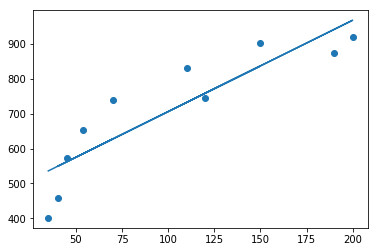

In [14]:
plt.scatter(zp[1], ks[0])
plt.plot(zp[1], zp[1]*w1+w0)

м
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [15]:
zp

array([[  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
       [ 35.,  45., 190., 200.,  40.,  70.,  54., 150., 120., 110.]])

In [16]:
ks

array([[401, 574, 874, 919, 459, 739, 653, 902, 746, 832]])

In [17]:
def mse_(w1, y = ks[0], x = zp[1], n = 10):
    return np.sum((w1*x) - y)**2 /n

In [18]:
alpha = 1e-6
n = 10

In [21]:
w1 = 0.1
for i in range(1000):
    w1 -= alpha * (2/n) * np.sum((w1 * zp[1] - ks[0]) *  zp[1])
    if i % 100 == 0:
        print(f'w1 = {w1}, i = {i}, mse = {mse_(w1):.2f}')

w1 = 0.25952808, i = 0, mse = 4672868.84
w1 = 5.54537842245223, i = 100, mse = 217853.55
w1 = 5.868748638669329, i = 200, mse = 131810.81
w1 = 5.888531320728348, i = 300, mse = 127245.00
w1 = 5.8897415574471985, i = 400, mse = 126968.29
w1 = 5.889815595583751, i = 500, mse = 126951.37
w1 = 5.889820124983314, i = 600, mse = 126950.34
w1 = 5.889820402076462, i = 700, mse = 126950.27
w1 = 5.88982041902807, i = 800, mse = 126950.27
w1 = 5.889820420065112, i = 900, mse = 126950.27


In [51]:
alpha = 5e-5
w1 = 0.1
w0 = 0.1
for i in range(1000000):
    w1_old = w1
    w0_old = w0
    w1 -= alpha * (2/n) * np.sum((w1_old * zp[1] + w0_old - ks[0]) *  zp[1])
    w0 -= alpha * (2/n) * np.sum((w1_old * zp[1] + w0_old - ks[0]))
    i += 1
    if i % 200000 == 0:
        print(f'w1 = {w1}, w0 = {w0}')

w1 = 2.6410083648410256, w0 = 441.3963447045292
w1 = 2.6206670838309534, w0 = 444.1599396983524
w1 = 2.6205396853349856, w0 = 444.177248236861
w1 = 2.6205388874315756, w0 = 444.17735664113843
w1 = 2.620538882434898, w0 = 444.17735731999403


### Задание 3
В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Таблица критических точек распределения Стьюдента применается когда неизвесто матеатическое ожидание и дисперсия генеральной совокупности, но мы знаем что величины распередены нормально.

Таблица значений функции Лапласа применяется для случаев когда мы знаем среднее и дисперсию генеральной совокупности и величины распеределены нормально.